我们先来看马氏链的一个具体的例子。社会学家经常把人按其经济状况分成3类：下层(lower-class)、中层(middle-class)、上层(upper-class)，我们用1,2,3 分别代表这三个阶层。社会学家们发现决定一个人的收入阶层的最重要的因素就是其父母的收入阶层。如果一个人的收入属于下层类别，那么他的孩子属于下层收入的概率是 0.65, 属于中层收入的概率是 0.28, 属于上层收入的概率是 0.07。事实上，从父代到子代，收入阶层的变化的转移概率如下:

$ \begin {array} {c|ccc}
\text {父\子}&class 1&class 2&class 3\\
\hline 
class 1 & 0.65 & 0.28 & 0.07 \\
class 2 & 0.15 & 0.67 & 0.18 \\
class 3 & 0.12 & 0.36 & 0.52 \\
\end{array}$

转移矩阵

$\displaystyle p = \begin{bmatrix} 0.65 & 0.28 & 0.07 \\ 0.15 & 0.67 & 0.18 \\ 0.12 & 0.36 & 0.52 \\ \end{bmatrix} $



假设当前这一代人处在下层、中层、上层的人的比例是概率分布向量 $ \pi_0=[\pi_0(1),\pi_0(2),\pi_0(3)] $，那么他们的子女的分布比例将是 $\pi_1 = \pi_0 P$, 他们的孙子代的分布比例将是 $\pi_2=\pi_1 P = \pi_0 P^2$, ......, 第n代子孙的收入分布比例将是 $\pi_n = \pi_0 P^n$

假设初始分布为$\pi_0=[0.21,0.68,0.11]$ 经过n代人后，分布为[0.286， 0.489， 0.225], 从第七代开始，这个分布就稳定不变了。如果用其他的初始分布，发现最终都收敛到分布概率$\pi=[0.286, 0.489, 0.225]$

$P^{20} = P^{21} = ... = P^{100} = \begin{bmatrix} 0.286 & 0.489 & 0.225 \\ 0.286 & 0.489 & 0.225 \\0.286 & 0.489 & 0.225 \\ \end{bmatrix}$

**马氏链定理**： 如果一个非周期马氏链具有转移概率矩阵P,且它的任何两个状态是连通的，那么 $\displaystyle\lim_{n \to \infty} P_{ij}^n$ 存在且与$i$无关，记 $\displaystyle\lim_{n \to \infty}P^n_{ij}=\pi(j)$, 我们有

$
\displaystyle \lim_{n \rightarrow \infty} P^n =\begin{bmatrix} 
\pi(1) & \pi(2) & \cdots & \pi(j) & \cdots \\ 
\pi(1) & \pi(2) & \cdots & \pi(j) & \cdots \\ 
\cdots & \cdots & \cdots & \cdots & \cdots \\ 
\pi(1) & \pi(2) & \cdots & \pi(j) & \cdots \\ 
\cdots & \cdots & \cdots & \cdots & \cdots \\ 
\end{bmatrix}
$

$ \displaystyle \pi(j) = \sum_{i=0}^{\infty}\pi(i)P_{ij}$

$\displaystyle \pi = [\pi(1), \pi(2), \cdots, \pi(j),\cdots ], \quad \sum_{i=0}^{\infty} \pi_i = 1$

### Markov Chain

就是在已知过程”现在“的条件下，其”将来“不依赖于过去。

Markov Chain 通常用条件分布率来表示，定义为 $P(X_{m+n} = a_j \mid X_{t_1}=a_{i_1}, X_{t_2}=a_{i_2},\cdots, X_{t_r}=a_{i_r},X_{t_m}=a_{i}) = P(X_{m+n} = a_j \mid X_m = a_i)$ 

$P_{ij}(m, m+n) = P(X_{m+n}=a_j \mid X_m=a_i) $ 为马氏链在时刻m处于状态$a_i$条件下，在时刻 m+n 转移到状态$a_j$的转移概率. 

Note: 我们定义链的状态空间, 即X可取值的范围。 $ I = \lbrace a_1, a_2, \cdots \rbrace, a_i \in \Bbb R $。 其概率就时落在某则状态$a_x$上的可能性。转换概率就是有多少$a_x$ 变化到$a_y$

由于链在时刻m从任何一个状态$a_i$出发，到另一个时刻m+n，必然转移到诸如$a_1, a_2, \cdots$ 诸状态中的某一个，所以

$\displaystyle \sum_{j=1}^{+\infty} P_{ij}(m, m+n) = 1, i=1,2,\cdots $

即从状态i出发，经过n步后，所有分散在状态j上各个取值的概率和为1。

下表为一步转移概率矩阵，step m -> step m+1

$
\begin {array}{c|ccccc}
\text {}&a_1&a_2&\cdots&a_j&\cdots\\
\hline 
a_1    & p11    & p12    & \cdots & p1j    & \cdots \\
a_2    & p21    & p22    & \cdots & p2j    & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\
a_i    & pi1    & pi1    & \cdots & pij    & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\
\end{array}
$ = P(1)

** Markov Chain Monte Carlo **

对于给定的概率分布p(x),我们希望能有便捷的方式生成它对应的样本。由于马氏链能收敛到平稳分布， 于是一个很的漂亮想法是：如果我们能构造一个转移矩阵为P的马氏链，使得该马氏链的平稳分布恰好是p(x), 那么我们从任何一个初始状态$x_0$出发沿着马氏链转移, 得到一个转移序列 $x_0, x_1, x_2, \cdots x_n, x_{n+1}\cdots,$， **如果马氏链在第n步已经收敛了，于是我们就得到了 $\pi(x)$ 的样本$x_n, x_{n+1}\cdots$。**



** 实验 **

假设从cauchy 分布中采样数据, cauchy 分布的概率密度函数时 

$ f(\theta) = \cfrac {1}{\pi (1+\theta^2)} $

接受概率$\alpha$的值为 

$ \alpha = \min \left( 1, \cfrac{1+{\theta^{(t)}}^2}{1+{\theta^{(*)}}^2} \right)$

In [13]:
import random
from scipy.stats import norm
import matplotlib.pyplot as plt

In [14]:
def cauchy(theta):
    y = 1.0 / (1.0 + theta **2)
    return y

In [15]:
T = 5000
sigma = 1
thetamin = -30
thetamax = 30
theta = [0.0] * (T+1)
theta[0] = random.uniform(thetamin, thetamax)

In [16]:
t = 0
while t<T:
    t = t + 1
    theta_star = norm.rvs(loc = theta[t-1], scale = sigma, size =1, random_state=None)
    #print(theta_star)
    alpha = min(1, (cauchy(theta_star[0])/cauchy(theta[t-1])))
    
    u = random.uniform(0,1)
    if u <= alpha:
        theta[t]= theta_star[0]
    else:
        theta[t] = theta[t-1]


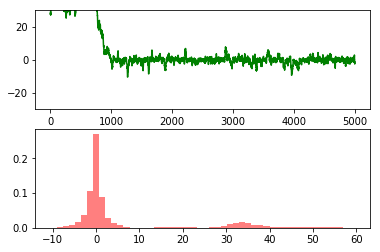

In [17]:
ax1 = plt.subplot(211)
ax2 = plt.subplot(212) 
plt.sca(ax1)
plt.ylim(thetamin, thetamax)
plt.plot(range(T+1), theta, 'g-')
plt.sca(ax2)
num_bins = 50
plt.hist(theta, num_bins, normed=1, facecolor='red', alpha=0.5)
plt.show()